In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

In [2]:
#drop futile columns
df1=pd.read_csv('train.csv')
df1=df1.drop(labels=['RowNumber','CustomerId','Surname'],axis=1)
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,682,France,Female,54,4,62397.41,1,1,0,113088.60,1
2,672,France,Female,31,5,119903.67,1,1,1,132925.17,0
3,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0
4,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0
...,...,...,...,...,...,...,...,...,...,...,...
7995,568,France,Female,35,6,121079.60,2,1,1,124890.50,1
7996,602,Germany,Female,45,7,145846.07,1,1,0,99276.02,0
7997,679,Spain,Female,43,5,132810.01,1,1,0,130780.85,1
7998,715,France,Male,38,4,118729.45,1,0,0,95484.52,0


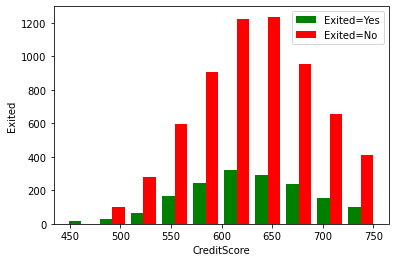

In [3]:
tenure_churn_no=df1[df1.Exited==0].CreditScore
tenure_churn_yes=df1[df1.Exited==1].CreditScore
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.xlabel('CreditScore')
plt.ylabel('Exited')
plt.legend()

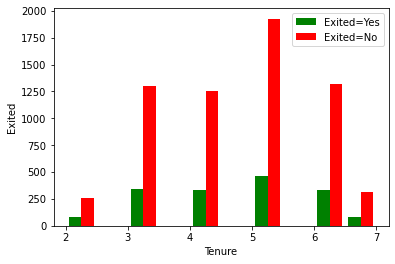

In [4]:
tenure_churn_no=df1[df1.Exited==0].Tenure
tenure_churn_yes=df1[df1.Exited==1].Tenure
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.xlabel('Tenure')
plt.ylabel('Exited')
plt.legend()

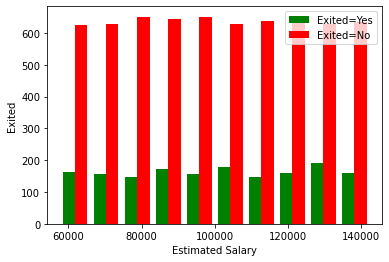

In [5]:
tenure_churn_no=df1[df1.Exited==0].EstimatedSalary
tenure_churn_yes=df1[df1.Exited==1].EstimatedSalary
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.xlabel('Estimated Salary')
plt.ylabel('Exited')
plt.legend()

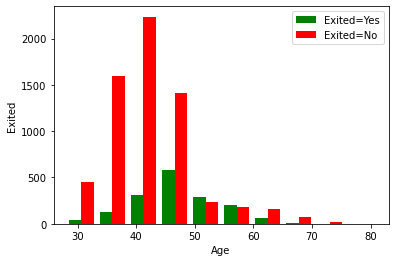

In [6]:
tenure_churn_no=df1[df1.Exited==0].Age
tenure_churn_yes=df1[df1.Exited==1].Age
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.xlabel('Age')
plt.ylabel('Exited')
plt.legend()

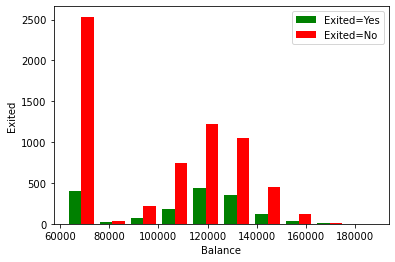

In [7]:
tenure_churn_no=df1[df1.Exited==0].Balance
tenure_churn_yes=df1[df1.Exited==1].Balance
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.xlabel('Balance')
plt.ylabel('Exited')
plt.legend()

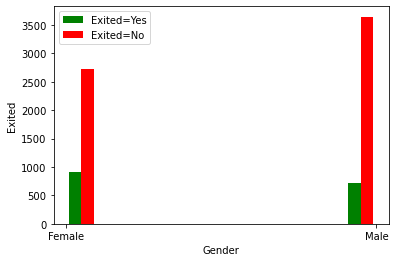

In [8]:
tenure_churn_no=df1[df1.Exited==0].Gender
tenure_churn_yes=df1[df1.Exited==1].Gender
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.xlabel('Gender')
plt.ylabel('Exited')
plt.legend()

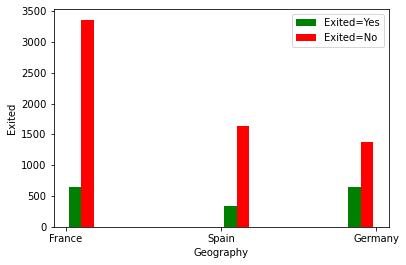

In [9]:
tenure_churn_no=df1[df1.Exited==0].Geography
tenure_churn_yes=df1[df1.Exited==1].Geography
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.xlabel('Geography')
plt.ylabel('Exited')
plt.legend()

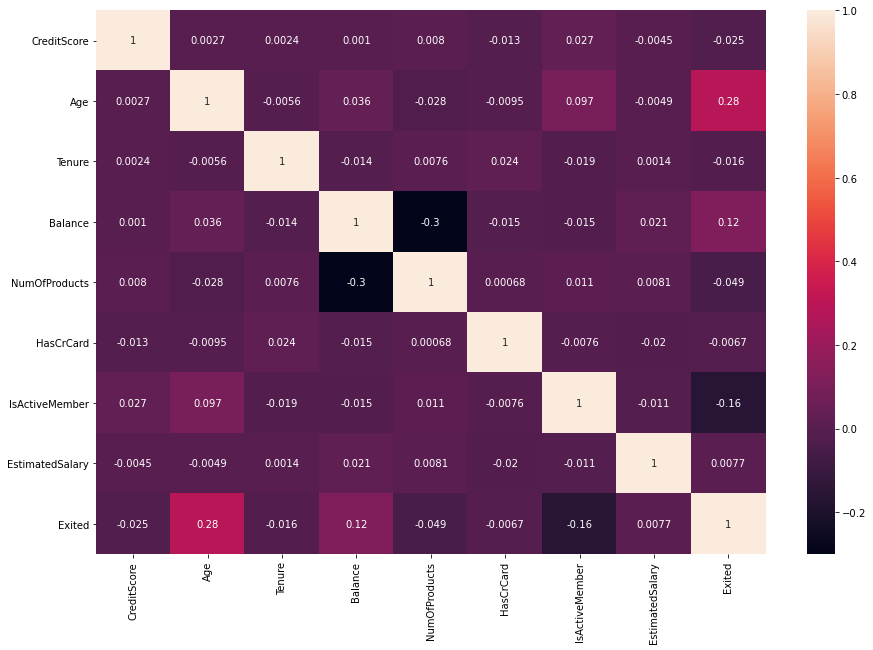

In [10]:
#correlation matrix
corrMatrix=df1.corr()
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [11]:
#label encoding
# labelencoder=LabelEncoder()
# df1['Geography']=labelencoder.fit_transform(df1['Geography'])
# df1['Gender']=labelencoder.fit_transform(df1['Gender'])

#one hot encoding
df1=pd.get_dummies(df1)

cols_to_scale=['CreditScore', 'Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
scaler=MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.892508,0.188679,0.6,0.409621,0.333333,0,1,0.589163,0,0,0,1,0,1
1,0.768730,0.490566,0.4,0.000000,0.000000,1,0,0.654032,1,1,0,0,1,0
2,0.736156,0.056604,0.6,0.456025,0.000000,1,1,0.887514,0,1,0,0,1,0
3,0.475570,0.226415,0.4,0.331954,0.000000,1,0,0.627770,0,0,0,1,1,0
4,1.000000,0.264151,0.6,0.459864,0.000000,0,1,0.810459,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.397394,0.132075,0.8,0.465350,0.333333,1,1,0.792944,1,1,0,0,1,0
7996,0.508143,0.320755,1.0,0.661749,0.000000,1,0,0.491455,0,0,1,0,1,0
7997,0.758958,0.283019,0.6,0.558373,0.000000,1,0,0.862275,1,0,0,1,1,0
7998,0.876221,0.188679,0.4,0.446714,0.000000,0,0,0.446828,0,1,0,0,0,1


In [12]:
x=df1.drop('Exited',axis=1)
y=df1['Exited']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=5)
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7038,0.436482,0.169811,0.8,0.291171,0.333333,1,1,0.135015,1,0,0,0,1
5420,0.993485,0.169811,0.6,0.000000,0.333333,1,1,0.381612,0,0,1,0,1
5998,0.439739,0.264151,0.6,0.000000,0.000000,1,1,0.938824,1,0,0,0,1
2706,0.657980,0.264151,0.6,0.440639,0.333333,1,0,0.232578,0,1,0,0,1
2159,0.700326,0.320755,0.8,0.000000,0.333333,1,1,0.526521,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0.452769,0.094340,0.4,0.000000,0.333333,0,1,0.622543,1,0,0,0,1
1725,0.589577,0.358491,0.8,0.340082,0.000000,0,0,0.112747,1,0,0,1,0
4079,0.586319,0.264151,0.2,0.742724,0.333333,1,0,0.464035,1,0,0,0,1
2254,0.661238,0.320755,0.6,0.421377,0.000000,1,1,0.452777,0,1,0,1,0


In [15]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy

#create neural network
model=Sequential([
    keras.layers.Dense(20,input_shape=(13,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
#training progress
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
200/200 [==============================] - 0s 609us/step - loss: 0.5598 - accuracy: 0.7270
Epoch 2/50
200/200 [==============================] - 0s 630us/step - loss: 0.4782 - accuracy: 0.7975
Epoch 3/50
200/200 [==============================] - 0s 702us/step - loss: 0.4672 - accuracy: 0.8023
Epoch 4/50
200/200 [==============================] - 0s 605us/step - loss: 0.4598 - accuracy: 0.8014
Epoch 5/50
200/200 [==============================] - 0s 632us/step - loss: 0.4525 - accuracy: 0.8072
Epoch 6/50
200/200 [==============================] - 0s 633us/step - loss: 0.4461 - accuracy: 0.8081
Epoch 7/50
200/200 [==============================] - 0s 642us/step - loss: 0.4404 - accuracy: 0.8120
Epoch 8/50
200/200 [==============================] - 0s 663us/step - loss: 0.4348 - accuracy: 0.8152
Epoch 9/50
200/200 [==============================] - 0s 624us/step - loss: 0.4318 - accuracy: 0.8145
Epoch 10/50
200/200 [==============================] - 0s 633us/step - loss: 0.425

In [34]:
#get testing data
df2=pd.read_csv('test.csv')
output=df2['RowNumber']
output=pd.DataFrame(output)
df2=df2.drop(labels=['RowNumber','CustomerId','Surname'],axis=1)
output


,RowNumber
0,2209
1,9924
2,4617
3,6077
4,9240
...,...
1995,7872
1996,4257
1997,2273
1998,315


In [19]:
#label encoding
# df2['Geography']=labelencoder.fit_transform(df2['Geography'])
# df2['Gender']=labelencoder.fit_transform(df2['Gender'])

#one hot encoding
df2=pd.get_dummies(df2)
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])
test_data=df2.to_numpy()

In [20]:
model.evaluate(x_test,y_test)

50/50 [==============================] - 0s 607us/step - loss: 0.3449 - accuracy: 0.8569


[0.34489673376083374, 0.8568750023841858]

In [21]:
yp=model.predict(x_test)
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [22]:
#check the precision, recall and f1-score
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1262
           1       0.77      0.46      0.58       338

    accuracy                           0.86      1600
   macro avg       0.82      0.71      0.74      1600
weighted avg       0.85      0.86      0.84      1600



In [23]:
result=model.predict(test_data)
result_binary=[]
for i in result:
    if i>0.5:
        result_binary.append(1)
    else:
        result_binary.append(0)

In [30]:
result_col=pd.DataFrame(result_binary)

,0
0,0
1,0
2,0
3,0
4,0
...,...
1995,0
1996,0
1997,0
1998,0


In [35]:
output['Exited']=result_col
output

,RowNumber,Exited
0,2209,0
1,9924,0
2,4617,0
3,6077,0
4,9240,0
...,...,...
1995,7872,0
1996,4257,0
1997,2273,0
1998,315,0


In [37]:
output.to_csv('upload.csv')